# **Notebook 1: Exploratory Data Analysis (EDA)**

## **Welcome to the Bias-Athon 2025 - Exploratory Data Analysis!**

### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
import warnings
warnings.filterwarnings("ignore")

### Load Train Data

In [33]:
data = pd.read_csv('/Users/jeremy/Desktop/widsdatathon2020/training_v2.csv')

# Display the first few rows of the dataset
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [34]:
data.columns.tolist()

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_m

In [35]:
print(data.columns.tolist())

cols_to_keep = [
 'patient_id', 
 'age', 
 'gender', 
 'ethnicity', 
 'elective_surgery', 
 'bmi', 
 'apache_4a_hospital_death_prob',
 'aids', 
 'cirrhosis', 
 'diabetes_mellitus', 
 'hepatic_failure', 
 'immunosuppression', 
 'leukemia', 
 'lymphoma', 
 'solid_tumor_with_metastasis',
 'readmission_status',
 'hospital_death'
]

data = data[cols_to_keep]
data.head()


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

,patient_id,age,gender,ethnicity,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,readmission_status,hospital_death
0,25312,68.0,M,Caucasian,0,22.73,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
1,59342,77.0,F,Caucasian,0,27.42,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,50777,25.0,F,Caucasian,0,31.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,46918,81.0,F,Caucasian,1,22.64,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,34377,19.0,M,Caucasian,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [36]:
# Get the unique values in the 'ethnicity' column
ethnicity_values = data['ethnicity'].unique()
print("Unique values in 'ethnicity' column:", ethnicity_values)


Unique values in 'ethnicity' column: ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


### Data visualizations (Table One)

In [37]:
def convert_age_bmi_to_categorical(data):
    import pandas as pd
    
    # Create bins and labels for Age
    age_bins = range(0, 91, 10)  # 0-10, 10-20, ... , 90-100
    age_labels = [f"{i}-{i+9}" for i in age_bins[:-1]]  # "0-9", "10-19", ...
    
    # Bin Age
    data['age_cat'] = pd.cut(
        data['age'], 
        bins=age_bins, 
        labels=age_labels, 
        right=False
    )
    
    # Create bins and labels for BMI
    bmi_bins = list(range(10, 46, 5)) + [float('inf')]  # 0-5, 5-10, ... , 40-45, >45
    bmi_labels = [f"{i}-{i+4}" for i in range(10, 45, 5)] + ['>45']  # "0-4", "5-9", ..., "40-44", ">45"
    # Bin BMI
    data['bmi_cat'] = pd.cut(
        data['bmi'], 
        bins=bmi_bins, 
        labels=bmi_labels, 
        right=False
    )
    
    return data

data = convert_age_bmi_to_categorical(data)


In [38]:
data.head()

,patient_id,age,gender,ethnicity,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,readmission_status,hospital_death,age_cat,bmi_cat
0,25312,68.0,M,Caucasian,0,22.73,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,60-69,20-24
1,59342,77.0,F,Caucasian,0,27.42,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,70-79,25-29
2,50777,25.0,F,Caucasian,0,31.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20-29,30-34
3,46918,81.0,F,Caucasian,1,22.64,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,80-89,20-24
4,34377,19.0,M,Caucasian,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,10-19,NaN


In [39]:
data_dummies = pd.get_dummies(data, columns=['gender', 'ethnicity', 'age_cat', 'bmi_cat'])
data_dummies.dtypes


patient_id                         int64
age                              float64
elective_surgery                   int64
bmi                              float64
apache_4a_hospital_death_prob    float64
aids                             float64
cirrhosis                        float64
diabetes_mellitus                float64
hepatic_failure                  float64
immunosuppression                float64
leukemia                         float64
lymphoma                         float64
solid_tumor_with_metastasis      float64
readmission_status                 int64
hospital_death                     int64
gender_F                            bool
gender_M                            bool
ethnicity_African American          bool
ethnicity_Asian                     bool
ethnicity_Caucasian                 bool
ethnicity_Hispanic                  bool
ethnicity_Native American           bool
ethnicity_Other/Unknown             bool
age_cat_0-9                         bool
age_cat_10-19   

In [40]:
data_dummies.columns.tolist()

['patient_id',
 'age',
 'elective_surgery',
 'bmi',
 'apache_4a_hospital_death_prob',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'readmission_status',
 'hospital_death',
 'gender_F',
 'gender_M',
 'ethnicity_African American',
 'ethnicity_Asian',
 'ethnicity_Caucasian',
 'ethnicity_Hispanic',
 'ethnicity_Native American',
 'ethnicity_Other/Unknown',
 'age_cat_0-9',
 'age_cat_10-19',
 'age_cat_20-29',
 'age_cat_30-39',
 'age_cat_40-49',
 'age_cat_50-59',
 'age_cat_60-69',
 'age_cat_70-79',
 'age_cat_80-89',
 'bmi_cat_10-14',
 'bmi_cat_15-19',
 'bmi_cat_20-24',
 'bmi_cat_25-29',
 'bmi_cat_30-34',
 'bmi_cat_35-39',
 'bmi_cat_40-44',
 'bmi_cat_>45']

In [41]:
data_dummies.shape


(91713, 40)

In [42]:
# Check for NaN values in the data
nan_values = data_dummies.isna().sum()
print("NaN values in each column:\n", nan_values)


NaN values in each column:
 patient_id                          0
age                              4228
elective_surgery                    0
bmi                              3429
apache_4a_hospital_death_prob    7947
aids                              715
cirrhosis                         715
diabetes_mellitus                 715
hepatic_failure                   715
immunosuppression                 715
leukemia                          715
lymphoma                          715
solid_tumor_with_metastasis       715
readmission_status                  0
hospital_death                      0
gender_F                            0
gender_M                            0
ethnicity_African American          0
ethnicity_Asian                     0
ethnicity_Caucasian                 0
ethnicity_Hispanic                  0
ethnicity_Native American           0
ethnicity_Other/Unknown             0
age_cat_0-9                         0
age_cat_10-19                       0
age_cat_20-29         

In [43]:
data_dropnan = data_dummies.dropna()
print(data_dropnan.isnull().sum())


patient_id                       0
age                              0
elective_surgery                 0
bmi                              0
apache_4a_hospital_death_prob    0
aids                             0
cirrhosis                        0
diabetes_mellitus                0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
readmission_status               0
hospital_death                   0
gender_F                         0
gender_M                         0
ethnicity_African American       0
ethnicity_Asian                  0
ethnicity_Caucasian              0
ethnicity_Hispanic               0
ethnicity_Native American        0
ethnicity_Other/Unknown          0
age_cat_0-9                      0
age_cat_10-19                    0
age_cat_20-29                    0
age_cat_30-39                    0
age_cat_40-49                    0
age_cat_50-59       

In [44]:
# Generate Table One
# Example usage of the tableone library to create Table One

from tableone import TableOne

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    'age_cat_0-9',
    'age_cat_10-19',
    'age_cat_20-29',
    'age_cat_30-39',
    'age_cat_40-49',
    'age_cat_50-59',
    'age_cat_60-69',
    'age_cat_70-79',
    'age_cat_80-89',
    'bmi_cat_10-14',
    'bmi_cat_15-19',
    'bmi_cat_20-24',
    'bmi_cat_25-29',
    'bmi_cat_30-34',
    'bmi_cat_35-39',
    'bmi_cat_40-44',
    'bmi_cat_>45',
    'gender_F',
    'gender_M',
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American',
    'ethnicity_Other/Unknown',
    'elective_surgery', 
    'aids', 
    'cirrhosis', 
    'diabetes_mellitus', 
    'hepatic_failure', 
    'immunosuppression', 
    'leukemia', 
    'lymphoma', 
    'solid_tumor_with_metastasis', 
    'hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1 = TableOne(
    data_dropnan, 
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
table1

Grouped by hospital_death                                                     
                                                                      Missing        Overall              0              1 P-Value
n                                                                                      77575          71052           6523        
age_cat_0-9, n (%)                            False                            77575 (100.0)  71052 (100.0)   6523 (100.0)   1.000
age_cat_10-19, n (%)                          False                             76929 (99.2)   70424 (99.1)    6505 (99.7)  <0.001
                                              True                                 646 (0.8)      628 (0.9)       18 (0.3)        
age_cat_20-29, n (%)                          False                             74177 (95.6)   67756 (95.4)    6421 (98.4)  <0.001
                                              True                                3398 (4.4)     3296 (4.6)      102 (1.6)        
age_cat_30-39, n (%)                          False                             73162 (94.3)   66819 (94.0)    6343 (97.2)  <0.001
                                              True                                4413 (5.7)     4233 (6.0)      180 (2.8)        
age_cat_40-49, n (%)                          False                             70399 (90.7)   64209 (90.4)    6190 (94.9)  <0.001
                                              True                                7176 (9.3)     6843 (9.6)      333 (5.1)        
age_cat_50-59, n (%)                          False                             63305 (81.6)   57674 (81.2)    5631 (86.3)  <0.001
                                              True                              14270 (18.4)   13378 (18.8)     892 (13.7)        
age_cat_60-69, n (%)                          False                             59708 (77.0)   54701 (77.0)    5007 (76.8)   0.687
                                              True                              17867 (23.0)   16351 (23.0)    1516 (23.2)        
age_cat_70-79, n (%)                          False                             60284 (77.7)   55555 (78.2)    4729 (72.5)  <0.001
                                              True                              17291 (22.3)   15497 (21.8)    1794 (27.5)        
age_cat_80-89, n (%)                          False                             65061 (83.9)   60226 (84.8)    4835 (74.1)  <0.001
                                              True                              12514 (16.1)   10826 (15.2)    1688 (25.9)        
bmi_cat_10-14, n (%)                          False                             77140 (99.4)   70693 (99.5)    6447 (98.8)  <0.001
                                              True                                 435 (0.6)      359 (0.5)       76 (1.2)        
bmi_cat_15-19, n (%)                          False                             71974 (92.8)   66158 (93.1)    5816 (89.2)  <0.001
                                              True                                5601 (7.2)     4894 (6.9)     707 (10.8)        
bmi_cat_20-24, n (%)                          False                             58658 (75.6)   53864 (75.8)    4794 (73.5)  <0.001
                                              True                              18917 (24.4)   17188 (24.2)    1729 (26.5)        
bmi_cat_25-29, n (%)                          False                             54556 (70.3)   49817 (70.1)    4739 (72.7)  <0.001
                                              True                              23019 (29.7)   21235 (29.9)    1784 (27.3)        
bmi_cat_30-34, n (%)                          False                             62783 (80.9)   57301 (80.6)    5482 (84.0)  <0.001
                                              True                              14792 (19.1)   13751 (19.4)    1041 (16.0)        
bmi_cat_35-39, n (%)                          False                             70148 (90.4)   64209 (90.4)    5939 (91.0)

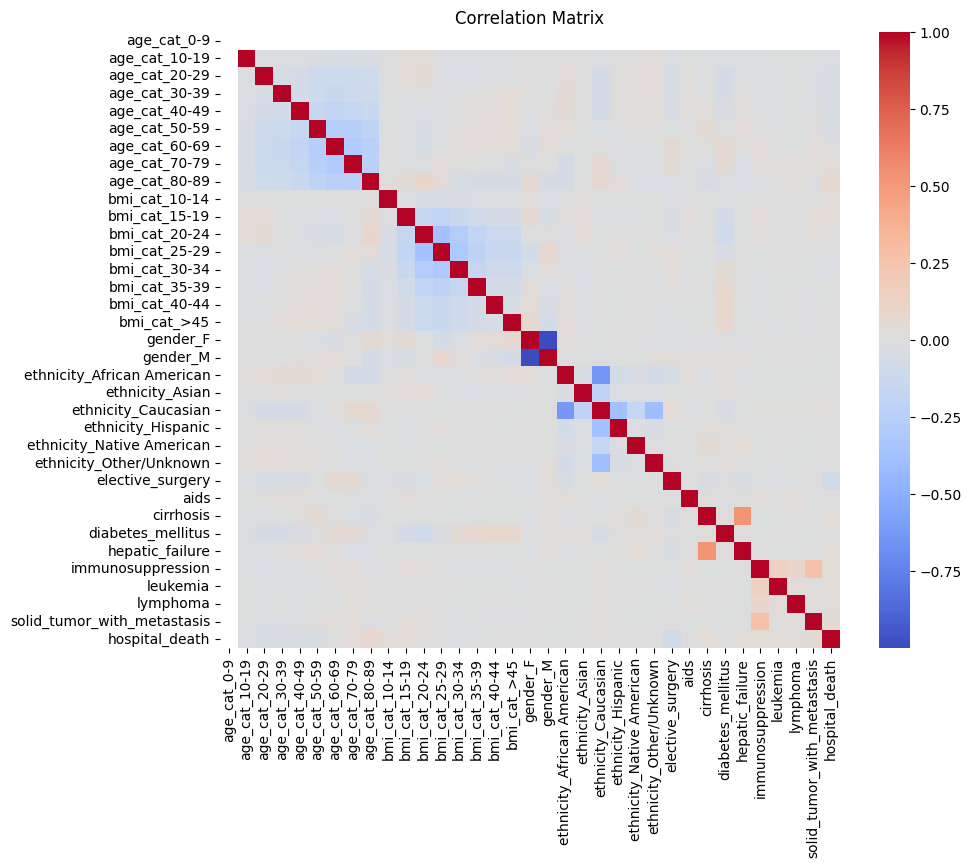

,age_cat_0-9,age_cat_10-19,age_cat_20-29,age_cat_30-39,age_cat_40-49,age_cat_50-59,age_cat_60-69,age_cat_70-79,age_cat_80-89,bmi_cat_10-14,...,elective_surgery,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
age_cat_0-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_cat_10-19,NaN,1.000000,-0.019613,-0.022506,-0.029257,-0.043508,-0.050128,-0.049077,-0.040189,0.002617,...,-0.026710,-0.002754,-0.011684,-0.021684,-0.009379,-0.014372,-0.002822,-0.005935,-0.012476,-0.018565
age_cat_20-29,NaN,-0.019613,1.000000,-0.052566,-0.068334,-0.101618,-0.117081,-0.114627,-0.093867,0.007546,...,-0.053838,0.010350,-0.021768,-0.057493,-0.020397,-0.025110,-0.009395,-0.011908,-0.027940,-0.041700
age_cat_30-39,NaN,-0.022506,-0.052566,1.000000,-0.078412,-0.116605,-0.134349,-0.131533,-0.107711,-0.000556,...,-0.043472,0.018568,-0.002483,-0.056124,0.001713,-0.021618,-0.015754,-0.005550,-0.025633,-0.038318
age_cat_40-49,NaN,-0.029257,-0.068334,-0.078412,1.000000,-0.151583,-0.174650,-0.170989,-0.140022,-0.006697,...,-0.037550,0.017077,0.023122,-0.032049,0.017083,-0.010808,-0.012622,-0.011018,-0.012256,-0.043351
age_cat_50-59,NaN,-0.043508,-0.101618,-0.116605,-0.151583,1.000000,-0.259718,-0.254274,-0.208224,-0.003127,...,-0.000757,0.007893,0.048719,-0.008846,0.036340,0.006071,-0.012372,-0.002373,0.015155,-0.036915
age_cat_60-69,NaN,-0.050128,-0.117081,-0.134349,-0.174650,-0.259718,1.000000,-0.292967,-0.239909,0.001153,...,0.052241,-0.007263,0.014440,0.059386,0.011843,0.026404,0.005890,-0.005518,0.024804,0.001504
age_cat_70-79,NaN,-0.049077,-0.114627,-0.131533,-0.170989,-0.254274,-0.292967,1.000000,-0.234880,-0.005375,...,0.054711,-0.015064,-0.030269,0.054920,-0.024143,0.021072,0.015877,0.018626,0.018237,0.037954
age_cat_80-89,NaN,-0.040189,-0.093867,-0.107711,-0.140022,-0.208224,-0.239909,-0.234880,1.000000,0.008837,...,-0.027398,-0.013180,-0.035249,-0.022867,-0.025386,-0.020811,0.014112,0.008007,-0.020567,0.080285
bmi_cat_10-14,NaN,0.002617,0.007546,-0.000556,-0.006697,-0.003127,0.001153,-0.005375,0.008837,1.000000,...,-0.019247,0.003493,-0.002695,-0.021429,-0.005683,0.001365,0.001714,0.003167,0.002172,0.024523


In [46]:

import seaborn as sns
import matplotlib.pyplot as plt

def correlation_matrix(data):
    corr_cols = categorical_vars
    df_corr = data[corr_cols].corr()

    #Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

    return df_corr

correlation_matrix(data_dropnan)

### Visualize Mortality per Ethnic Group (Normalized)

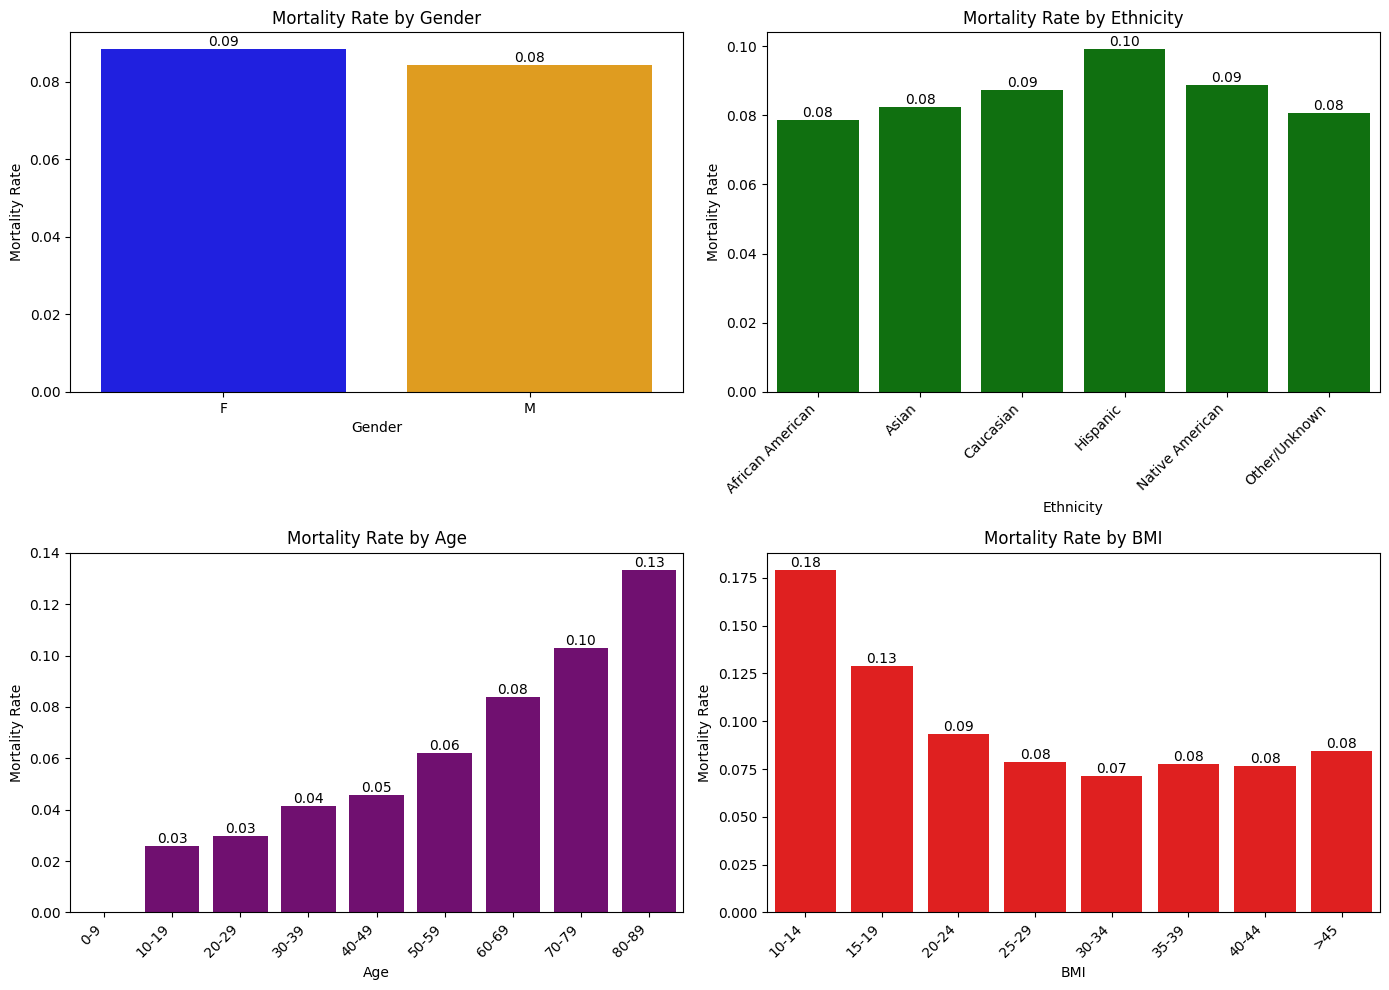

In [15]:
# Debugged code to plot all 4 histograms in a single figure


# Calculate mortality rates by gender
gender_mortality = data.groupby('gender')['hospital_death'].mean().reset_index()

# Calculate mortality rates by ethnicity
ethnicity_mortality = data.groupby('ethnicity')['hospital_death'].mean().reset_index()

# Calculate mortality rates by age
age_mortality = data.groupby('age_cat')['hospital_death'].mean().reset_index()

# Calculate mortality rates by bmi
bmi_mortality = data.groupby('bmi_cat')['hospital_death'].mean().reset_index()

# Create a figure with 2 rows and 2 columns
plt.figure(figsize=(14, 10))

# Subplot 1: Mortality by Gender
plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='hospital_death', data=gender_mortality, palette=['blue', 'orange'])
plt.title('Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=0)
# Add values on top of the bars
for index, value in enumerate(gender_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 2: Mortality by Ethnicity
plt.subplot(2, 2, 2)
sns.barplot(x='ethnicity', y='hospital_death', data=ethnicity_mortality, color='green')
plt.title('Mortality Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(ethnicity_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 3: Mortality by Age
plt.subplot(2, 2, 3)
sns.barplot(x='age_cat', y='hospital_death', data=age_mortality, color='purple')
plt.title('Mortality Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(age_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 4: Mortality by BMI
plt.subplot(2, 2, 4)
sns.barplot(x='bmi_cat', y='hospital_death', data=bmi_mortality, color='red')
plt.title('Mortality Rate by BMI')
plt.xlabel('BMI')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(bmi_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Train Test Split

In [16]:
# Drop the 'gender_M' and 'ethnicity_Other' columns
data_dropnan = data_dropnan.drop(columns=['gender_M', 'ethnicity_Other/Unknown'])


In [17]:

from sklearn.model_selection import train_test_split

# Define your features and target variable
X = data_dropnan.drop('hospital_death', axis=1)  # Features
y = data_dropnan['hospital_death']               # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62060, 37)
X_test shape: (15515, 37)
y_train shape: (62060,)
y_test shape: (15515,)


### Random Forest Model

In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate AUROC
from sklearn.metrics import roc_auc_score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"AUROC: {auroc:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92
AUROC: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14214
           1       0.57      0.21      0.30      1301

    accuracy                           0.92     15515
   macro avg       0.75      0.60      0.63     15515
weighted avg       0.90      0.92      0.90     15515

Confusion Matrix:
[[14010   204]
 [ 1032   269]]


## Plot Differences in Performance by Subgroups

AUROC by Ethnicity: {'ethnicity_African American': 0.8490542659181713, 'ethnicity_Asian': 0.8253947368421053, 'ethnicity_Caucasian': 0.8253826651141709, 'ethnicity_Hispanic': 0.8745353159851301, 'ethnicity_Native American': 0.9330188679245283}
AUROC by Gender: {'Female': 0.820194957375233, 'Male': 0.8369823509694363}
AUROC by Age: {'age_cat_10-19': 0.8398496240601505, 'age_cat_20-29': 0.852400295420975, 'age_cat_30-39': 0.8866031546621999, 'age_cat_40-49': 0.869219109138464, 'age_cat_50-59': 0.8517756746626687, 'age_cat_60-69': 0.8206389272332874, 'age_cat_70-79': 0.8072222222222223, 'age_cat_80-89': 0.7497869543451761}
AUROC by BMI: {'bmi_cat_10-14': 0.7097222222222223, 'bmi_cat_15-19': 0.7615758193241637, 'bmi_cat_20-24': 0.8070675782873117, 'bmi_cat_25-29': 0.8422179334916865, 'bmi_cat_30-34': 0.8464550318995678, 'bmi_cat_35-39': 0.8639132940117706, 'bmi_cat_40-44': 0.858764865624122, 'bmi_cat_>45': 0.7863499245852187}


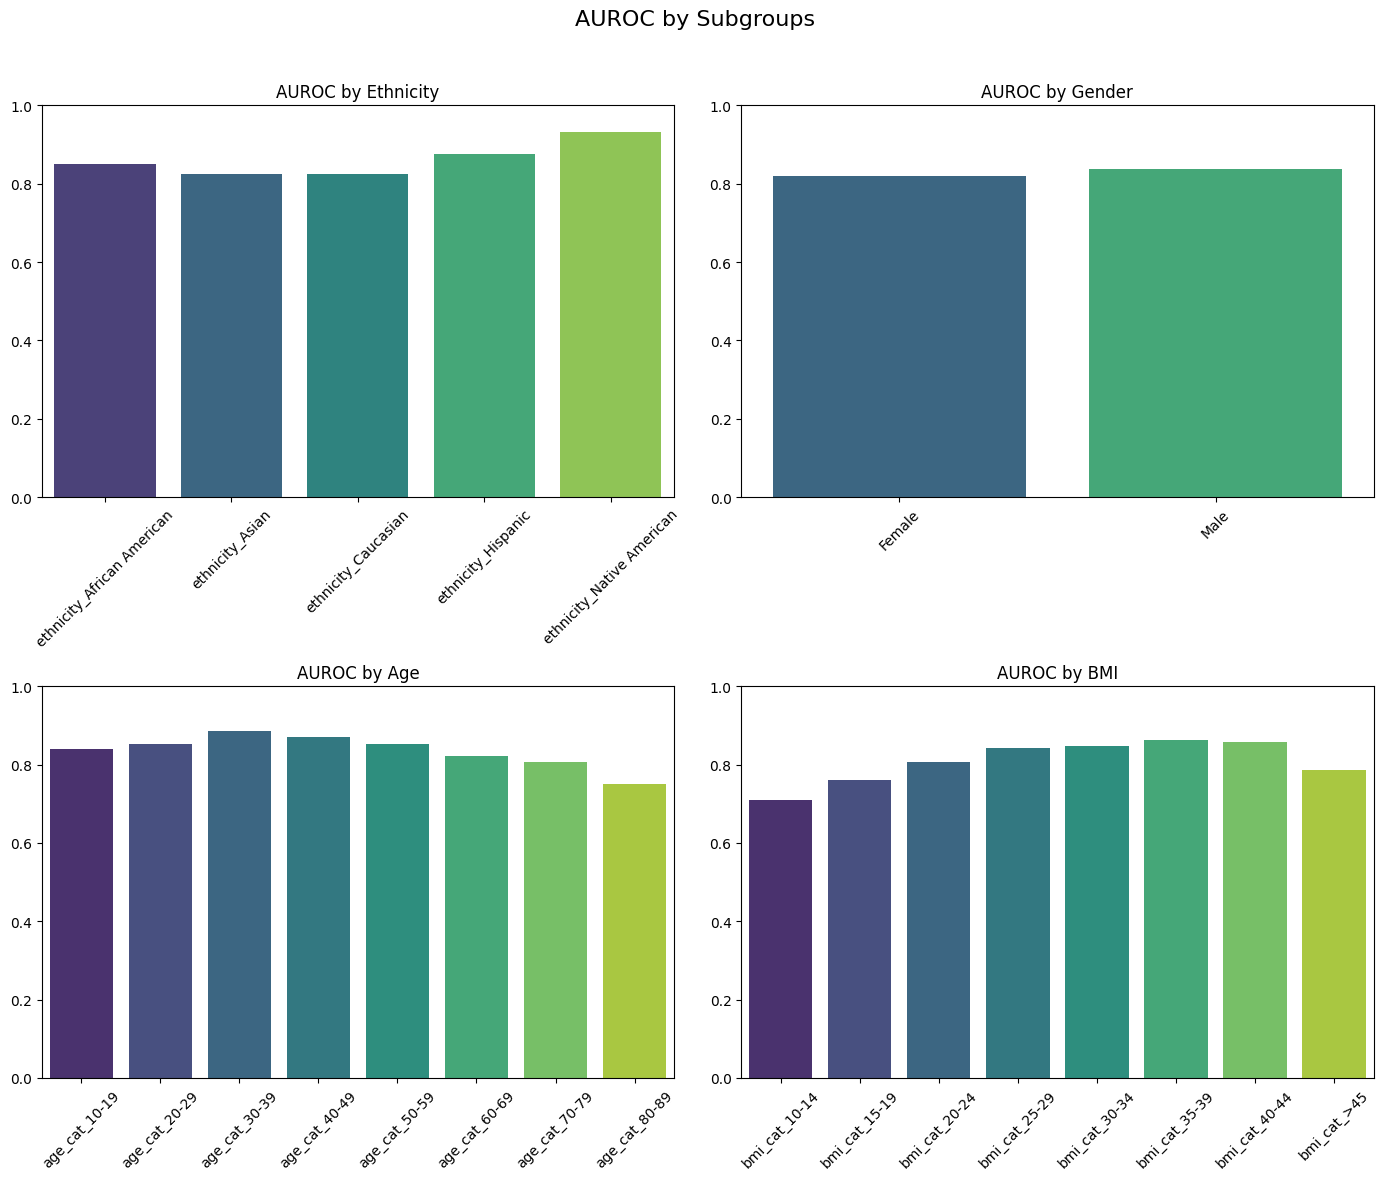

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

# Same helper function for ethnicity / age / BMI
def calculate_auroc_by_group(data, group_columns, model, X_test, y_test):
    auroc_scores_else = {}
    for group_column in group_columns:
        # Filter the test set for the current group
        group_indices = (X_test[group_column] == 1)
        X_group = X_test[group_indices]
        y_group = y_test[group_indices]
        
        # Calculate AUROC if the group has enough samples
        if len(y_group) > 0:
            y_pred_proba_group = model.predict_proba(X_group)[:, 1]
            auroc_scores_else[group_column] = roc_auc_score(y_group, y_pred_proba_group)
    
    return auroc_scores_else

# Helper function for a single gender column (by default "gender_F")
def calculate_auroc_for_gender(model, X_test, y_test, gender_column='gender_F'):
    auroc_scores_by_gender = {}

    # Females
    female_indices = (X_test[gender_column] == 1)
    X_female = X_test[female_indices]
    y_female = y_test[female_indices]
    if len(y_female) > 0:
        y_pred_proba_female = model.predict_proba(X_female)[:, 1]
        auroc_scores_by_gender['Female'] = roc_auc_score(y_female, y_pred_proba_female)

    # Males
    male_indices = (X_test[gender_column] == 0)
    X_male = X_test[male_indices]
    y_male = y_test[female_indices == False]  # or simply y_test[male_indices]
    if len(y_male) > 0:
        y_pred_proba_male = model.predict_proba(X_male)[:, 1]
        auroc_scores_by_gender['Male'] = roc_auc_score(y_male, y_pred_proba_male)

    return auroc_scores_by_gender

# Example subgroup columns
ethnicity_columns = [
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American'
]

age_columns = [
    'age_cat_10-19', 'age_cat_20-29', 'age_cat_30-39',
    'age_cat_40-49', 'age_cat_50-59', 'age_cat_60-69',
    'age_cat_70-79', 'age_cat_80-89'
]

bmi_columns = [
    'bmi_cat_10-14', 'bmi_cat_15-19', 'bmi_cat_20-24', 'bmi_cat_25-29',
    'bmi_cat_30-34', 'bmi_cat_35-39', 'bmi_cat_40-44', 'bmi_cat_>45'
]

data_dropnan['gender_M'] = 1 - data_dropnan['gender_F']  # only if "gender_F" exists!

# Now calculate AUROC for each subgroup
auroc_by_ethnicity = calculate_auroc_by_group(
    data_dropnan, ethnicity_columns, rf_model, X_test, y_test
)

# For gender, we have a simpler specialized function:
auroc_by_gender = calculate_auroc_for_gender(
    rf_model, X_test, y_test, gender_column='gender_F'
)

auroc_by_age = calculate_auroc_by_group(
    data_dropnan, age_columns, rf_model, X_test, y_test
)

auroc_by_bmi = calculate_auroc_by_group(
    data_dropnan, bmi_columns, rf_model, X_test, y_test
)

print("AUROC by Ethnicity:", auroc_by_ethnicity)
print("AUROC by Gender:", auroc_by_gender)
print("AUROC by Age:", auroc_by_age)
print("AUROC by BMI:", auroc_by_bmi)

# Finally, plot the four sets of results in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('AUROC by Subgroups', fontsize=16)

# 1) Ethnicity
sns.barplot(
    ax=axes[0, 0],
    x=list(auroc_by_ethnicity.keys()),
    y=list(auroc_by_ethnicity.values()),
    palette='viridis'
)
axes[0, 0].set_title('AUROC by Ethnicity')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2) Gender
sns.barplot(
    ax=axes[0, 1],
    x=list(auroc_by_gender.keys()),
    y=list(auroc_by_gender.values()),
    palette='viridis'
)
axes[0, 1].set_title('AUROC by Gender')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3) Age
sns.barplot(
    ax=axes[1, 0],
    x=list(auroc_by_age.keys()),
    y=list(auroc_by_age.values()),
    palette='viridis'
)
axes[1, 0].set_title('AUROC by Age')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4) BMI
sns.barplot(
    ax=axes[1, 1],
    x=list(auroc_by_bmi.keys()),
    y=list(auroc_by_bmi.values()),
    palette='viridis'
)
axes[1, 1].set_title('AUROC by BMI')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Change underlying distrbution of patient population

In [48]:
data_altered = data_dropnan.copy()

def random_switch_ethnicity_classes_80_percent_african_american(data_altered):
    import random
    
    # Define the ethnicity columns
    ethnicity_cols = [
        'ethnicity_African American',
        'ethnicity_Asian',
        'ethnicity_Caucasian',
        'ethnicity_Hispanic',
        'ethnicity_Native American'
    ]
    
    for i in range(len(data_altered)):
        # Generate a random number between 0 and 1
        if random.random() < 0.8:
            # Make this row "African American"
            data_altered.loc[i, ethnicity_cols] = 0
            data_altered.loc[i, 'ethnicity_African American'] = 1
        else:
            # Choose one of the other ethnicities at random
            other_ethnicities = [col for col in ethnicity_cols if col != 'ethnicity_African American']
            chosen_ethnicity = random.choice(other_ethnicities)
            
            # Reset all to 0 and set only the chosen column to 1
            data_altered.loc[i, ethnicity_cols] = 0
            data_altered.loc[i, chosen_ethnicity] = 1
    
    return data_altered

